In [9]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

In [10]:
folder_labels_file = open('dataset/ImageLabels.txt', "r")
fLabel = folder_labels_file.read()
folderLabels = fLabel.split('\n')
folder_labels_file.close()
print(folderLabels)

['fresh_apple', 'fresh_banana', 'fresh_bitter_gourd', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_apple', 'stale_banana', 'stale_bitter_gourd', 'stale_capsicum', 'stale_orange', 'stale_tomato']


In [11]:
fresh_dir_list = []
filenames = []
for i in range(6):
    filenames = os.listdir('dataset/'+folderLabels[i])
    #print(filenames[:5])
    for f in range(len(filenames)):
        fresh_dir_list.append('dataset/'+folderLabels[i]+'/'+filenames[f])

fresh_dir_list[:10]

['dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 4.59.57 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.00.03 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.00.12 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.00.18 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.00.26 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.00.50 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.01.08 PM.png',
 'dataset/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 5.01.15 PM.png']

In [12]:
stale_dir_list = []
filenames = []
for i in range(6, 12):
    filenames = os.listdir('dataset/'+folderLabels[i])
    #print(filenames[:5])
    for f in range(len(filenames)):
        stale_dir_list.append('dataset/'+folderLabels[i]+'/'+filenames[f])

stale_dir_list[:10]

['dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.15.20 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.15.34 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.15.50 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.16.54 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.17.15 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.17.25 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.18.13 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.18.57 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.19.15 PM.png',
 'dataset/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.19.46 PM.png']

In [13]:
fresh = len(fresh_dir_list)
stale = len(stale_dir_list)

fresh, stale

(7038, 7644)

In [14]:
freshLabel = []

for i in range(fresh):
    freshLabel.append('Fresh')

staleLabel = []

for i in range(stale):
    staleLabel.append('Stale')

len(freshLabel)

7038

In [15]:
df = pd.DataFrame({'Name': fresh_dir_list+stale_dir_list, 'Label': freshLabel+staleLabel})
df

,Name,Label
0,dataset/fresh_apple/rotated_by_15_Screen Shot ...,Fresh
1,dataset/fresh_apple/rotated_by_15_Screen Shot ...,Fresh
2,dataset/fresh_apple/rotated_by_15_Screen Shot ...,Fresh
3,dataset/fresh_apple/rotated_by_15_Screen Shot ...,Fresh
4,dataset/fresh_apple/rotated_by_15_Screen Shot ...,Fresh
...,...,...
14677,dataset/stale_tomato/DSCN4239.jpg_0_9768.jpg,Stale
14678,dataset/stale_tomato/DSCN4239.jpg_0_9787.jpg,Stale
14679,dataset/stale_tomato/DSCN4239.jpg_0_9792.jpg,Stale
14680,dataset/stale_tomato/DSCN4239.jpg_0_9820.jpg,Stale


In [16]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Name,Label
0,dataset/fresh_orange/rotated_by_30_Screen Shot...,Fresh
1,dataset/fresh_orange/vertical_flip_Screen Shot...,Fresh
2,dataset/fresh_orange/rotated_by_15_Screen Shot...,Fresh
3,dataset/fresh_tomato/IMG_20200725_095424.jpg_0...,Fresh
4,dataset/stale_apple/rotated_by_30_Screen Shot ...,Stale


In [17]:
X = df['Name']
y = df['Label']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.size, X_val.size, y_train.size, y_val.size

(11745, 2937, 11745, 2937)

In [24]:
%matplotlib inline

img = cv.imread(X[0], cv.IMREAD_ANYCOLOR | cv.IMREAD_ANYDEPTH)
cv.imshow('', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [27]:
img.shape

(290, 312, 3)

## Performing image classification with tensorflow

In [29]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [70]:
boolean_labels = [label == unique_labels for label in y]
boolean_labels[0] # Fresh, Stale

array([ True, False])

In [38]:
BATCH_SIZE= 32
IMG_SIZE = 250

In [39]:
# Creating tensor from image

tf.constant(img)

<tf.Tensor: shape=(290, 312, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

In [40]:
def process_image(image_path):
  """
  Takes image filepath and convert it into tensors
  """

  # Read an image file
  image = tf.io.read_file(image_path)

  # Turn the jpg img into tensors with RBG coding (3 color channel)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values - NORMALIZATION
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image (250x250)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [41]:
def get_image_label(image_path, label):
  """
  Takes an image filename and associated label, processes the image and returns a touple of image, label
  """
  image = process_image(image_path)
  return image, label

In [42]:
process_image(X[0]), tf.constant(y[0])

(<tf.Tensor: shape=(250, 250, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

In [43]:
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and labels (y) pairs.
  Shuffles the training data, but does not shuffle the validation data.
  Also accepts test data as input (no labels).
  """

  # If the data is the test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths and no lables
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is the valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)  # Create image, label touples
    return data_batch

  # If the data is the training dataset, we need to shuffle it
  else:
    print("Creating training data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling the pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # This also turns image path into preprocessed image
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  boolean_labels,
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(11745, 11745, 2937, 2937)

In [72]:
train_data = create_data_batches(X_train, y_train)

val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches.. 
Creating validation data batches.. 


In [73]:
# Check out different attributes for our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

In [74]:
import matplotlib.pyplot as plt

# Create a function for viewing image in a data batch

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and plot their labels from data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots of 5 rows x 5 columns
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(labels[i])
    # Turn the grid lines off
    plt.axis("off")

C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


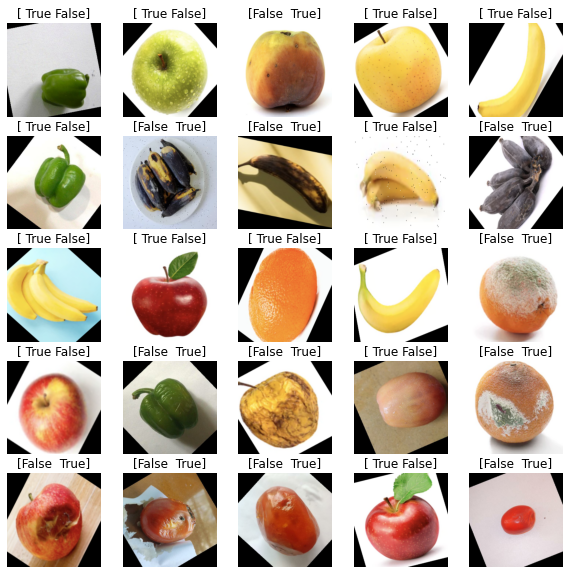

In [75]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

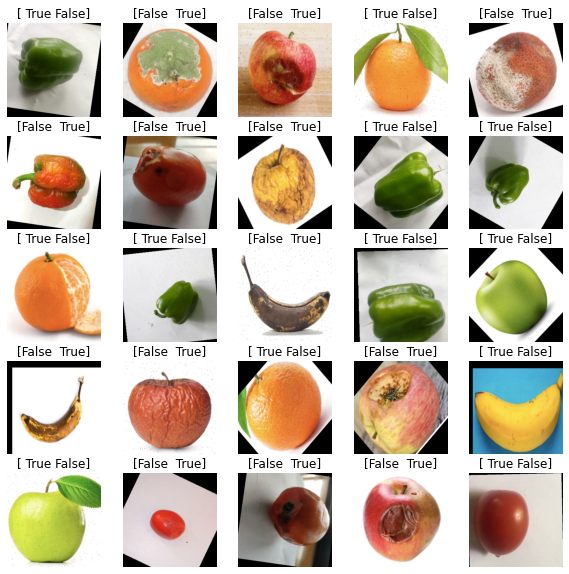

In [76]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [77]:
unique_labels = np.unique(y)
unique_labels

array(['Fresh', 'Stale'], dtype=object)

In [78]:
# Setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape to the model

OUTPUT_SHAPE = len(unique_labels)

In [79]:
MODEL_URL = "https://tfhub.dev/google/bit/m-r50x1/imagenet21k_classification/1"

In [80]:
import tensorflow_hub as hub

# Create a function that builds Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with: ", model_url)

  # Setup the model layers

  model = tf.keras.Sequential([
    hub.KerasLayer(model_url),                   #Layer 1 - INPUT LAYER
    tf.keras.layers.Dense(units=output_shape,
                          activation="softmax")  #Layer 2 - OUTPUT LAYER
                               
  ])

  # Compile the model

  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(input_shape)

  return model

In [81]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/bit/m-r50x1/imagenet21k_classification/1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 21843)             68256659  
                                                                 
 dense_2 (Dense)             (None, 2)                 43688     
                                                                 
Total params: 68,300,347
Trainable params: 43,688
Non-trainable params: 68,256,659
_________________________________________________________________


In [82]:
# Load tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [83]:
import datetime

# Create a function to build a tensorboard callback

def create_tensorboard_callback():
  # Create a log directory for storing tensorboard log
  logdir = os.path.join("logs",
                        # Make it such that logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [84]:
# Create an early stopping callback 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [85]:
# This variable defines how many passes of our data would we like our model to do.
NUM_EPOCHS = 100 

In [86]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [87]:
model = train_model()

Building model with:  https://tfhub.dev/google/bit/m-r50x1/imagenet21k_classification/1
Epoch 1/100
368/368 [==============================] - 2295s 6s/step - loss: 7.9885 - accuracy: 0.7809 - val_loss: 15.7722 - val_accuracy: 0.5083
Epoch 2/100
368/368 [==============================] - 2225s 6s/step - loss: 2.1127 - accuracy: 0.8816 - val_loss: 5.4353 - val_accuracy: 0.6718
Epoch 3/100
368/368 [==============================] - 2526s 7s/step - loss: 2.0130 - accuracy: 0.8985 - val_loss: 5.0099 - val_accuracy: 0.9067
Epoch 4/100
368/368 [==============================] - 2257s 6s/step - loss: 2.4478 - accuracy: 0.8961 - val_loss: 6.7957 - val_accuracy: 0.8536
Epoch 5/100
368/368 [==============================] - 2250s 6s/step - loss: 2.7157 - accuracy: 0.9069 - val_loss: 1.8920 - val_accuracy: 0.9040
Epoch 6/100
368/368 [==============================] - 2242s 6s/step - loss: 1.5081 - accuracy: 0.9378 - val_loss: 1.1023 - val_accuracy: 0.9517
Epoch 7/100
368/368 [====================

In [88]:
%tensorboard --logdir logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [89]:
predictions = model.predict(val_data, verbose=1)
predictions

92/92 [==============================] - 455s 5s/step


array([[1.0000000e+00, 1.7912747e-08],
       [0.0000000e+00, 1.0000000e+00],
       [2.3928359e-36, 1.0000000e+00],
       ...,
       [1.0000000e+00, 2.6475860e-37],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [90]:
np.sum(predictions[0])

1.0

In [91]:
# First prediction

index = 0
print(predictions[index])
print(f"Max value (prediction probability): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_labels[np.argmax(predictions[index])]}")

[1.0000000e+00 1.7912747e-08]
Max value (prediction probability): 1.0
Sum: 1.0
Max index: 0
Predicted label: Fresh


In [92]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into label
  """

  return unique_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities 
pred_label = get_pred_label(predictions[0])

pred_label

'Fresh'

In [93]:
# Create a function to unbatch a batch dataset

def unbatchify(data):
  """
  Takes batched dataset of image, labels Tensors and return seperate arrays of images and labels.
  """
  images_ = []
  labels_ = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_labels[np.argmax(label)])

  return images_, labels_

In [94]:
val_images, val_labels = unbatchify(val_data)

val_images[0], val_labels[0]

(array([[[0.01252668, 0.01850316, 0.00636198],
         [0.01494827, 0.01993757, 0.01174507],
         [0.00991686, 0.01383843, 0.00198337],
         ...,
         [0.        , 0.00578824, 0.00373333],
         [0.        , 0.00578824, 0.00373333],
         [0.        , 0.0067664 , 0.        ]],
 
        [[0.00854187, 0.01441067, 0.00533867],
         [0.01461578, 0.02021578, 0.00958049],
         [0.01719593, 0.02111749, 0.00822934],
         ...,
         [0.00139067, 0.0025309 , 0.        ],
         [0.00128305, 0.00263851, 0.        ],
         [0.00117537, 0.00274619, 0.        ]],
 
        [[0.00933333, 0.01512157, 0.00373333],
         [0.00633725, 0.01278964, 0.0006378 ],
         [0.00390431, 0.00782588, 0.        ],
         ...,
         [0.00878404, 0.        , 0.        ],
         [0.00840777, 0.        , 0.        ],
         [0.00548325, 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [95]:
get_pred_label(predictions[0]) # Predicted value

'Fresh'

In [96]:
get_pred_label(val_labels[0]) # Actual value

'Fresh'

In [97]:
def plot_pred(prediction_probabilities, labels, images, n=0):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get pred labels
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on the prediction (true/false)
  if pred_label==true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

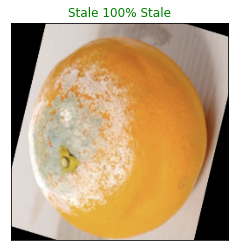

In [98]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images,
          n=77)

In [99]:
def save_model(model, suffix=None):
  """
  Save a given model in model directory and append a suffix (string)
  """

  # Create a model directory pathname with current time
  modeldir = os.path.join("model", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  model_path = modeldir + "-" + suffix + ".h5" # Save format for model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [100]:
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading a saved model from {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer": hub.KerasLayer})
  
  return model

In [101]:
save_model(model, suffix="foodQualityDetection")

Saving model to: model\20220507-144935-foodQualityDetection.h5...


'model\\20220507-144935-foodQualityDetection.h5'

In [104]:
loadedModel = load_model("model/20220507-144935-foodQualityDetection.h5")

Loading a saved model from model/20220507-144935-foodQualityDetection.h5...


In [137]:
custom = "custom/"
custom_image = [custom + fname for fname in os.listdir(custom)]

In [139]:
custom_data = create_data_batches(custom_image, test_data=True)
custom_data

Creating test data batches.. 


<BatchDataset shapes: (None, 250, 250, 3), types: tf.float32>

In [140]:
custom_preds = loadedModel.predict(custom_data)
custom_preds.shape

(3, 2)

In [141]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['Stale', 'Fresh', 'Stale']

In [143]:
# Get custom images (our unbatchify function won't work as there are no labels)

custom_images = []

# Loop through unbatched data

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

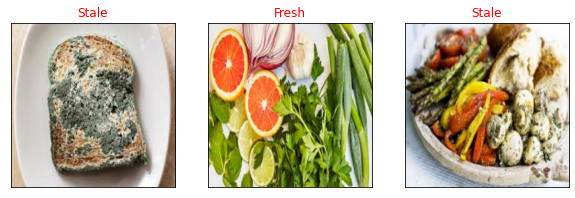

In [146]:
# Check custom image predictions 

plt.figure(figsize=(10, 10))

for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  t = plt.title(custom_pred_labels[i])
  plt.setp(t, color='r')
  plt.imshow(image)